In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

**Generating a pandas dataframe from the source .csv file**

In [4]:
# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load csv file and generate pandas dataframe
input_csv = r'..\data\clean\after_step_3b_outliers_cat.csv' # Fill your path to file
df_1 = pd.read_csv(input_csv, sep = ',')

df_1.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,0,0,1,0,370,Installed,4,To renovate,0,F,767.0,2552.000000,415.906128,East Flanders,NaN,True,1,0,0
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,0,0,1,0,895,Installed,2,Good,0,D,1050.0,1796.401198,285.713333,East Flanders,NaN,True,1,2,2
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,0,0,1,10,20,Semi equipped,2,To renovate,0,E,120.0,1785.714286,2291.666667,Antwerp,NaN,True,2,0,1
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,0,0,1,0,300,Installed,3,To renovate,0,F,309.0,1715.116279,954.692557,Brabant_Wallon,NaN,True,1,0,0
4,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,4.228425,0,1,1,36,374,Installed,3,As new,0,C,374.0,2553.571429,1911.764706,Brabant_Wallon,NaN,True,1,4,3


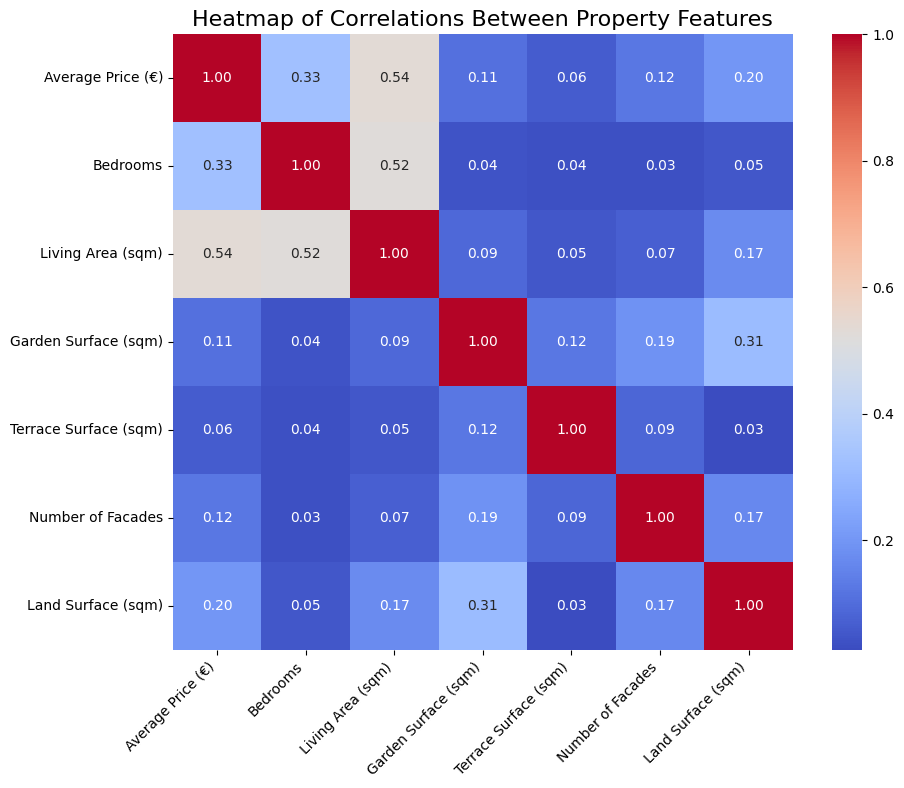

In [8]:
# Step 1: Select interesting columns
corr_df = df_1[['Price', 'Number_of_bedrooms', 'Living_area', 'gardenSurface', 'terraceSurface', 'Number_of_facades', 'landSurface']]

# Step 2: Rename columns for better display
corr_df = corr_df.rename(columns={
    'Price': 'Average Price (€)',
    'Number_of_bedrooms': 'Bedrooms',
    'Living_area': 'Living Area (sqm)',
    'gardenSurface': 'Garden Surface (sqm)',
    'terraceSurface': 'Terrace Surface (sqm)',
    'Number_of_facades': 'Number of Facades',
    'landSurface': 'Land Surface (sqm)'
})

# Step 3: Calculate correlations
corr_matrix = corr_df.corr()

# Step 4: Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Customize the title and labels
plt.title('Heatmap of Correlations Between Property Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


**Saving data to a new .csv file and a .pkl file**

In [3]:
# Save data to new csv file

output_csv = r'..\data\clean\after_step_4_correlation.csv'  # Fill your path to file
df_1.to_csv(output_csv, index=False)


# Save data to new pkl file

import pickle
output_pkl = r'..\data\clean\after_step_4_correlation.pkl' # Fill your path to file
with open(output_pkl, 'wb') as f:
    pickle.dump(df_1, f)
